<a href="https://colab.research.google.com/github/sush0677/pytorch_coding/blob/main/Neuralnetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
#Neural network classification with pytorch
from sklearn.datasets import make_circles
import torch
import matplotlib.pyplot as plt

#creating circles
n_samples = 1000
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [46]:
len(X), len(y)

(1000, 1000)

In [47]:
#dataframe of cicles data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y})
circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


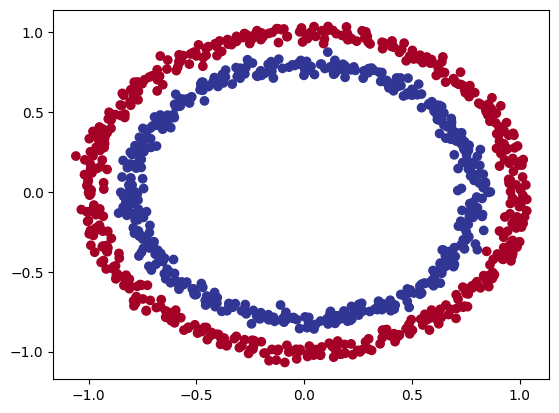

In [48]:
#visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)


In [49]:
#input and output shapes
X.shape, y.shape

((1000, 2), (1000,))

In [50]:
X_sample = X[0]
y_sample = y[0]
print(X_sample, y_sample)
X_sample.shape, y_sample.shape

[0.75424625 0.23148074] 1


((2,), ())

In [51]:
#turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
#building model
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [54]:
class CircleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=5)
        self.layer_2 = nn.Linear(in_features=5, out_features=1)

    def forward(self, x):
        return self.layer_2(self.layer_1(x)) # x is input --> layer 1 --> layer 2 --> output

model_1 = CircleModel().to(device)
model_1


CircleModel(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [55]:
device

'cpu'

In [56]:
next(model_1.parameters()).device

device(type='cpu')

In [57]:
#lets replicate the model
model_1 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)
model_1

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [58]:
model_1.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]])),
             ('0.bias', tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370])),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]])),
             ('1.bias', tensor([-0.1213]))])

In [59]:
#making prdeictions
with torch.inference_mode():
    untrained_preds = model_1(X_test.to(device))
untrained_preds
print(untrained_preds[:10])
print(y_test[:10])


tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967],
        [ 0.2968],
        [ 0.1405],
        [ 0.2178],
        [ 0.0805],
        [-0.0284]])
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [60]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

In [61]:
#loss fuction
loss_fn = nn.BCEWithLogitsLoss() # has a sigmoid activision funtion built in

optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)



In [62]:
#alculating the accuracy
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [63]:
model_1.eval()
with torch.inference_mode():
    y_logits = model_1(X_test.to(device))
y_pred_probs = torch.sigmoid(y_logits)
y_preds = torch.round(y_pred_probs)
y_pred_labels = torch.round(torch.sigmoid(model_1(X_test.to(device)))) #
print(torch.eq(y_test, y_pred_labels))
print(y_logits[:10])
print(y_pred_probs[:10])
print(y_preds[:10])
# y_logits

tensor([[False,  True, False,  ...,  True, False, False],
        [False,  True, False,  ...,  True, False, False],
        [ True, False,  True,  ..., False,  True,  True],
        ...,
        [ True, False,  True,  ..., False,  True,  True],
        [False,  True, False,  ...,  True, False, False],
        [ True, False,  True,  ..., False,  True,  True]])
tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967],
        [ 0.2968],
        [ 0.1405],
        [ 0.2178],
        [ 0.0805],
        [-0.0284]])
tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736],
        [0.5737],
        [0.5351],
        [0.5542],
        [0.5201],
        [0.4929]])
tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.]])


In [64]:
#training and testing loop
torch.manual_seed(42)
epochs = 100

for epoch in range(epochs):
    model_1.train()
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # Reshape y_train to match y_logits
    loss = loss_fn(y_logits, y_train) # Add a dimension to y_train

    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_1.eval()
    with torch.inference_mode():
    # 1. Forward pass
          test_logits = model_1(X_test).squeeze()
          test_pred = torch.round(torch.sigmoid(test_logits))

    # Reshape y_test to match the model output in the testing phase as well
          test_loss = loss_fn(model_1(X_test.to(device)), y_test.to(device).unsqueeze(1))
          test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}% ")

Epoch: 0 | Loss: 0.69796, Acc: 51.88% | Test Loss: 0.69440, Test Acc: 58.00% 
Epoch: 10 | Loss: 0.69590, Acc: 51.25% | Test Loss: 0.69305, Test Acc: 53.00% 
Epoch: 20 | Loss: 0.69490, Acc: 51.62% | Test Loss: 0.69254, Test Acc: 49.50% 
Epoch: 30 | Loss: 0.69435, Acc: 51.12% | Test Loss: 0.69236, Test Acc: 49.50% 
Epoch: 40 | Loss: 0.69401, Acc: 50.88% | Test Loss: 0.69232, Test Acc: 51.00% 
Epoch: 50 | Loss: 0.69378, Acc: 50.25% | Test Loss: 0.69234, Test Acc: 50.00% 
Epoch: 60 | Loss: 0.69362, Acc: 50.00% | Test Loss: 0.69239, Test Acc: 51.50% 
Epoch: 70 | Loss: 0.69351, Acc: 50.25% | Test Loss: 0.69246, Test Acc: 51.00% 
Epoch: 80 | Loss: 0.69342, Acc: 49.88% | Test Loss: 0.69254, Test Acc: 50.00% 
Epoch: 90 | Loss: 0.69336, Acc: 49.88% | Test Loss: 0.69262, Test Acc: 53.00% 


In [65]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)



helper_functions.py already exists, skipping download


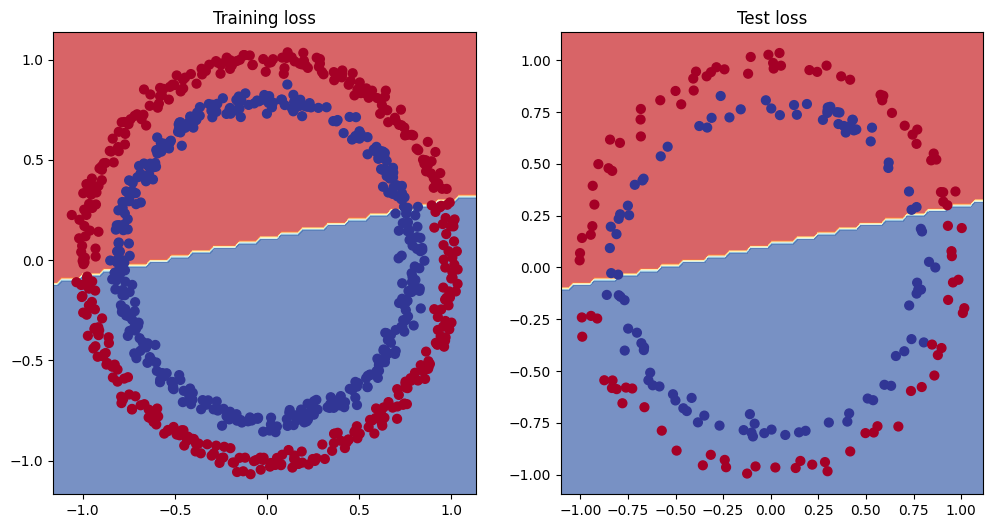

In [66]:
from helper_functions import plot_decision_boundary, plot_predictions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Training loss")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test loss")
plot_decision_boundary(model_1, X_test, y_test)
#

In [67]:
#improving the model
class CircleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)


    def forward(self, x):
        return self.layer_3(self.layer_2(self.layer_1(x)))
        # return self.layer_2(self.layer_1(x)) # x is input --> layer 1 --> layer 2 --> output

model_2 = CircleModel().to(device)
model_2


CircleModel(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [68]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)
model_2.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1

In [69]:
#training loop for the new model
torch.manual_seed(42)
epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    model_2.train()
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # Reshape y_train to match y_logits
    loss = loss_fn(y_logits, y_train) # Add a dimension to y_train

    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

#testing loop
    model_2.eval()
    with torch.inference_mode():
    # 1. Forward pass
          test_logits = model_2(X_test).squeeze()
          test_pred = torch.round(torch.sigmoid(test_logits))

    # calculate the loss
          test_loss = loss_fn(test_logits, y_test)
          test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}% ")


Epoch: 0 | Loss: 0.69331, Acc: 49.25% | Test Loss: 0.69261, Test Acc: 51.00% 
Epoch: 100 | Loss: 0.69331, Acc: 49.25% | Test Loss: 0.69261, Test Acc: 51.00% 
Epoch: 200 | Loss: 0.69331, Acc: 49.25% | Test Loss: 0.69261, Test Acc: 51.00% 
Epoch: 300 | Loss: 0.69331, Acc: 49.25% | Test Loss: 0.69261, Test Acc: 51.00% 
Epoch: 400 | Loss: 0.69331, Acc: 49.25% | Test Loss: 0.69261, Test Acc: 51.00% 
Epoch: 500 | Loss: 0.69331, Acc: 49.25% | Test Loss: 0.69261, Test Acc: 51.00% 
Epoch: 600 | Loss: 0.69331, Acc: 49.25% | Test Loss: 0.69261, Test Acc: 51.00% 
Epoch: 700 | Loss: 0.69331, Acc: 49.25% | Test Loss: 0.69261, Test Acc: 51.00% 
Epoch: 800 | Loss: 0.69331, Acc: 49.25% | Test Loss: 0.69261, Test Acc: 51.00% 
Epoch: 900 | Loss: 0.69331, Acc: 49.25% | Test Loss: 0.69261, Test Acc: 51.00% 


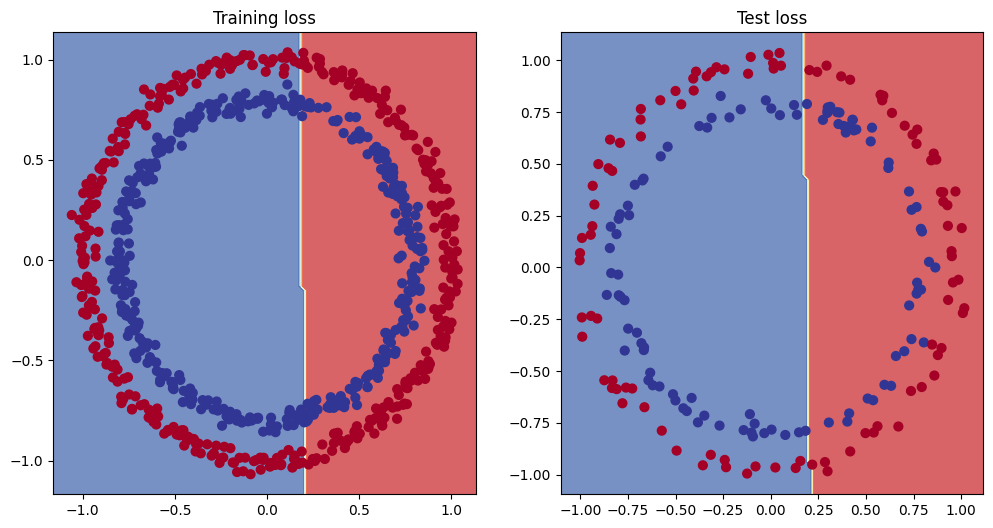

In [70]:
#plot the desicion boundary
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Training loss")
plot_decision_boundary(model_2, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test loss")
plot_decision_boundary(model_2, X_test, y_test)

In [71]:
#creating some data
w = 0.7
b = 0.3

start = 0
end = 1
step = 0.01
X_reg = torch.arange(start, end, step).unsqueeze(dim=1)
y_reg = w * X_reg + b
len(X_reg), len(y_reg)

(100, 100)

In [72]:
#create trin and test splits
train_split = int(0.8 * len(X_reg))
X_train_reg, y_train_reg = X_reg[:train_split], y_reg[:train_split]
X_test_reg, y_test_reg = X_reg[train_split:], y_reg[train_split:]
len(X_train_reg), len(y_train_reg), len(X_test_reg), len(y_test_reg)


(80, 80, 20, 20)

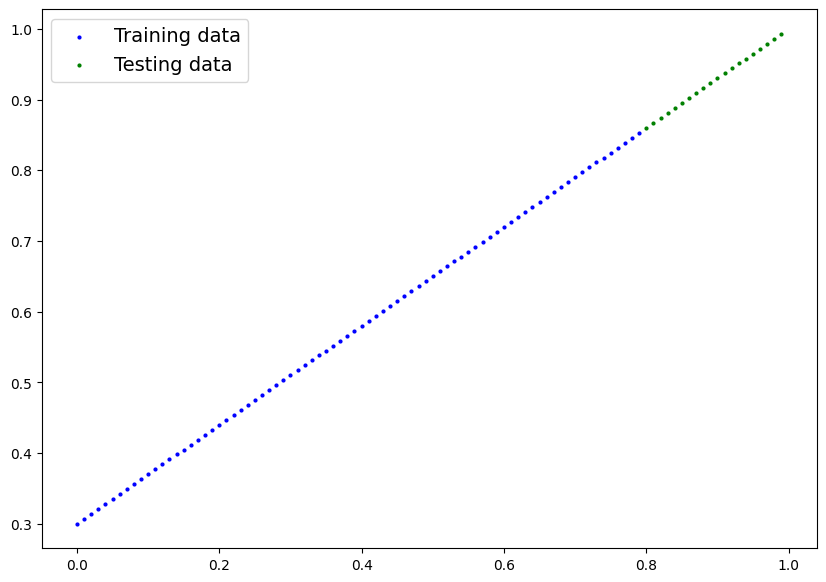

In [73]:
plot_predictions(train_data=X_train_reg,
                train_labels=y_train_reg,
                test_data=X_test_reg,
                test_labels=y_test_reg,
                predictions=None)


In [74]:
#adujusting the model
model_3 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_3

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [75]:
#loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_3.parameters(), lr=0.01)


In [76]:
#Train the model
torch.manual_seed(42)
epochs = 1000

X_train_reg, y_train_reg = X_train_reg.to(device), y_train_reg.to(device)
X_test_reg, y_test_reg = X_test_reg.to(device), y_test_reg.to(device)

for epoch in range(epochs):
    model_3.train()
    y_pred = model_3(X_train_reg).squeeze()
    loss = loss_fn(y_pred, y_train_reg)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_3.eval()
    with torch.inference_mode():
        test_pred = model_3(X_test_reg).squeeze()
        test_loss = loss_fn(test_pred, y_test_reg)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test Loss: {test_loss:.5f}")


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([80, 1])) that is different to the input size (torch.Size([80])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([20, 1])) that is different to the input size (torch.Size([20])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Epoch: 0 | Loss: 0.75986 | Test Loss: 0.91103
Epoch: 100 | Loss: 0.15113 | Test Loss: 0.18804
Epoch: 200 | Loss: 0.14384 | Test Loss: 0.25465
Epoch: 300 | Loss: 0.14137 | Test Loss: 0.29286
Epoch: 400 | Loss: 0.14049 | Test Loss: 0.31570
Epoch: 500 | Loss: 0.14017 | Test Loss: 0.32919
Epoch: 600 | Loss: 0.14006 | Test Loss: 0.33740
Epoch: 700 | Loss: 0.14001 | Test Loss: 0.34264
Epoch: 800 | Loss: 0.14000 | Test Loss: 0.34522
Epoch: 900 | Loss: 0.14000 | Test Loss: 0.34557


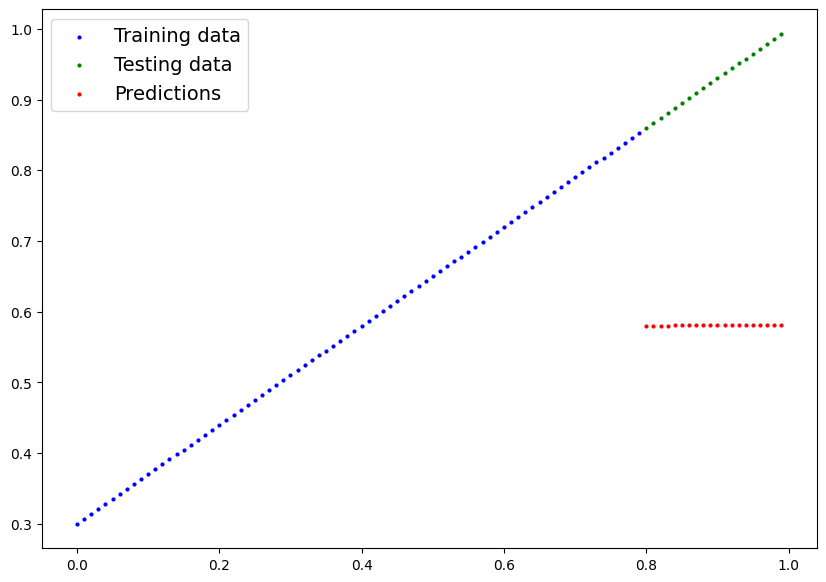

In [77]:
#Evalution mode
model_3.eval()
with torch.inference_mode():
    y_preds = model_3(X_test_reg).squeeze()

plot_predictions(train_data=X_train_reg,
                train_labels=y_train_reg,
                test_data=X_test_reg,
                test_labels=y_test_reg,
                predictions=y_preds)


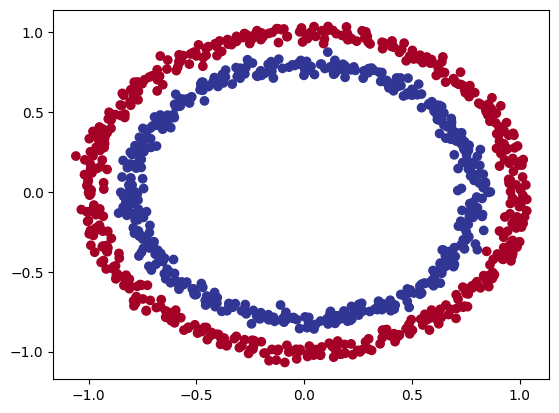

In [78]:
#non - linerity
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000
X_circles, y_circles = make_circles(n_samples,
                                 noise=0.03,
                                 random_state=42)

plt.scatter(X_circles[:, 0], X_circles[:, 1], c=y_circles, cmap=plt.cm.RdYlBu)


In [79]:
#Convert data to tensors and then train and test splits
import torch
from sklearn.model_selection import train_test_split

X_circles = torch.from_numpy(X_circles).type(torch.float)
y_circles = torch.from_numpy(y_circles).type(torch.float)

#split into train and test sets
X_train_circles, X_test_circles, y_train_circles, y_test_circles = train_test_split(X_circles, y_circles, test_size=0.2, random_state=42)

X_train_circles[:5], y_train_circles[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [80]:
#building a model with non-liner actvision function
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()


    def forward(self, x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))


model_4 = CircleModelV2().to(device)
model_4


CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [81]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_4.parameters(), lr=0.1)


In [82]:
#Training the model with non linear activision function
torch.manual_seed(42)
epochs = 1000

X_train_circles, y_train_circles = X_train_circles.to(device), y_train_circles.to(device)
X_test_circles, y_test_circles = X_test_circles.to(device), y_test_circles.to(device)

for epoch in range(epochs):
    model_4.train()
    y_logits = model_4(X_train_circles).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) #logits --> prediction probilities --> predicition labels

    loss = loss_fn(y_logits, y_train_circles)
    acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #testing
    model_4.eval()
    with torch.inference_mode():
        test_logits = model_4(X_test_circles).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits, y_test_circles)
        test_acc = accuracy_fn(y_true=y_test_circles, y_pred=test_pred)


    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}% ")




Epoch: 0 | Loss: 0.69295, Acc: 50.00% | Test Loss: 0.69319, Test Acc: 50.00% 
Epoch: 100 | Loss: 0.69115, Acc: 52.88% | Test Loss: 0.69102, Test Acc: 52.50% 
Epoch: 200 | Loss: 0.68977, Acc: 53.37% | Test Loss: 0.68940, Test Acc: 55.00% 
Epoch: 300 | Loss: 0.68795, Acc: 53.00% | Test Loss: 0.68723, Test Acc: 56.00% 
Epoch: 400 | Loss: 0.68517, Acc: 52.75% | Test Loss: 0.68411, Test Acc: 56.50% 
Epoch: 500 | Loss: 0.68102, Acc: 52.75% | Test Loss: 0.67941, Test Acc: 56.50% 
Epoch: 600 | Loss: 0.67515, Acc: 54.50% | Test Loss: 0.67285, Test Acc: 56.00% 
Epoch: 700 | Loss: 0.66659, Acc: 58.38% | Test Loss: 0.66322, Test Acc: 59.00% 
Epoch: 800 | Loss: 0.65160, Acc: 64.00% | Test Loss: 0.64757, Test Acc: 67.50% 
Epoch: 900 | Loss: 0.62362, Acc: 74.00% | Test Loss: 0.62145, Test Acc: 79.00% 


In [83]:
#evaluating a model
model_4.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_4(X_test_circles).squeeze()))


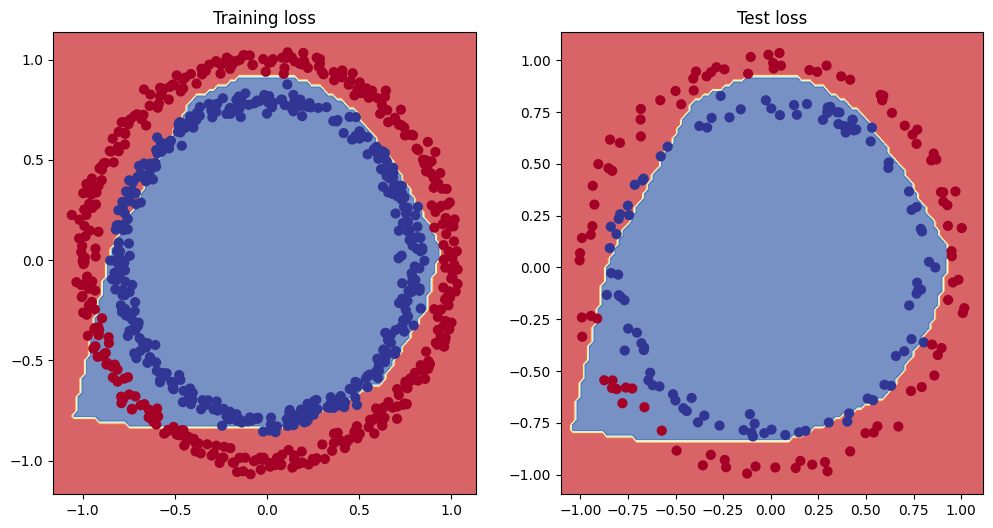

In [84]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Training loss")
plot_decision_boundary(model_4, X_train_circles, y_train_circles)
plt.subplot(1, 2, 2)
plt.title("Test loss")
plot_decision_boundary(model_4, X_test_circles, y_test_circles)